In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import glob
import os
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.colors import LogNorm
from matplotlib.ticker import ScalarFormatter


In [2]:
# Load Data
date = "20230804"
ds = xr.open_dataset(f"/home/alubianashari/RAQMS_CloudMasked_TEMPO/RAQMS_TEMPO_{date}.nc")

In [3]:
ds

<xarray.Dataset> Size: 366MB
Dimensions:        (lat: 2950, lon: 7750)
Coordinates:
  * lat            (lat) float32 12kB 14.01 14.03 14.05 ... 72.95 72.97 72.99
  * lon            (lon) float32 31kB -168.0 -168.0 -167.9 ... -13.03 -13.01
Data variables:
    no2_daily_avg  (lat, lon) float32 91MB ...
    no2_masked     (lat, lon) float32 91MB ...
    tempo_no2_avg  (lat, lon) float64 183MB ...

In [4]:
raqms = ds["no2_masked"].values.flatten()
tempo = ds["tempo_no2_avg"].values.flatten()

#valid if non nan values both raqms and tempo
valid = ~np.isnan(raqms) & ~np.isnan(tempo)
raqms_valid = raqms[valid]
tempo_valid = tempo[valid]  

print(len(raqms_valid))
print(len(tempo_valid))


5436218
5436218


/tmp/ipykernel_1911862/3862142721.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


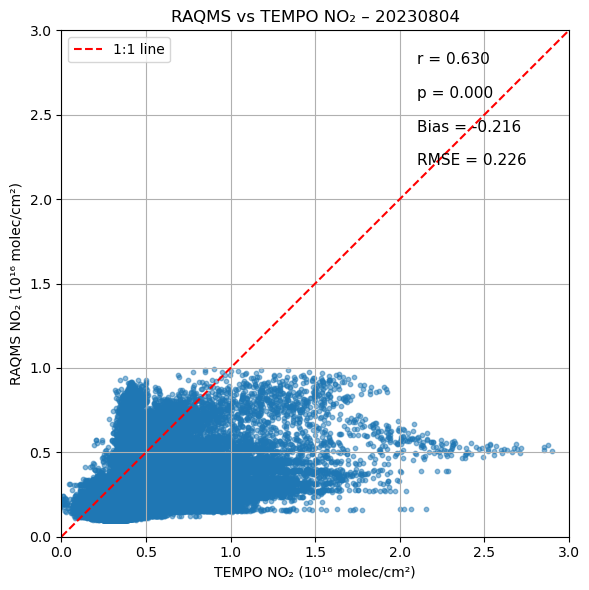

In [5]:
r, p = pearsonr(tempo_valid, raqms_valid)
bias = np.mean(raqms_valid - tempo_valid)
rmse = np.sqrt(np.mean((raqms_valid - tempo_valid) ** 2))

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(tempo_valid, raqms_valid, s=10, alpha=0.5)
plt.plot([0, 3], [0, 3], 'r--', label="1:1 line")

plt.xlabel("TEMPO NO₂ (10¹⁶ molec/cm²)")
plt.ylabel("RAQMS NO₂ (10¹⁶ molec/cm²)")
plt.title(f"RAQMS vs TEMPO NO₂ – {date}")
plt.grid(True)
plt.xlim(0, 3)
plt.ylim(0, 3)

plt.text(2.1, 2.8, f"r = {r:.3f}", fontsize=11)
plt.text(2.1, 2.6, f"p = {p:.3f}", fontsize=11)
plt.text(2.1, 2.4, f"Bias = {bias:.3f}", fontsize=11)
plt.text(2.1, 2.2, f"RMSE = {rmse:.3f}", fontsize=11)

plt.legend()
plt.tight_layout()
plt.show()

In [2]:
path = "/home/alubianashari/RAQMS_CloudMasked_TEMPO/"
files = sorted(glob.glob(os.path.join(path, "RAQMS_TEMPO_202308*.nc")))

# exclude 
excluded_dates = ["20230823", "20230827"]

# list to hold all data
raqms_all = []
tempo_all = []

for f in files:
    filename = os.path.basename(f)
    date_str = filename.split("_")[2][:8]
    
    if date_str in excluded_dates:
        print(f"Skipping {date_str}")
        continue
    
    ds = xr.open_dataset(f)
    raqms = ds["no2_masked"].values.flatten()
    tempo = ds["tempo_no2_avg"].values.flatten()
    valid = ~np.isnan(raqms) & ~np.isnan(tempo) #valid if non nan values both raqms and gems
    raqms_all.append(raqms[valid])
    tempo_all.append(tempo[valid])

# combined array
raqms_all = np.concatenate(raqms_all)
tempo_all = np.concatenate(tempo_all)

# statistics
r, p = pearsonr(tempo_all, raqms_all)
bias = np.mean(raqms_all - tempo_all)
rmse = np.sqrt(np.mean((raqms_all - tempo_all) ** 2))

Skipping 20230823
Skipping 20230827


/tmp/ipykernel_2606919/4199458051.py:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_2606919/4199458051.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f"{output_dir}/stats_tempo_v2.png", facecolor='white', bbox_inches='tight')
/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


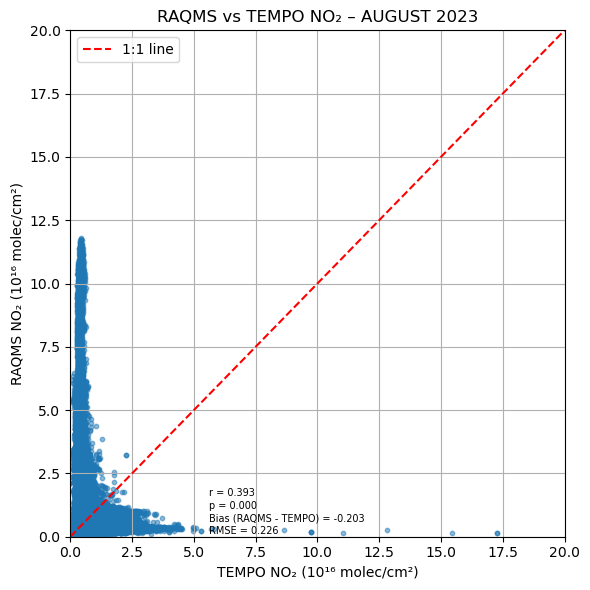

In [3]:
output_dir = "TEMPO_stats"
os.makedirs(output_dir, exist_ok=True)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(tempo_all, raqms_all, s=10, alpha=0.5)
plt.plot([0, 20], [0, 20], 'r--', label="1:1 line")

plt.xlabel("TEMPO NO₂ (10¹⁶ molec/cm²)")
plt.ylabel("RAQMS NO₂ (10¹⁶ molec/cm²)")
plt.title(f"RAQMS vs TEMPO NO₂ – AUGUST 2023")
plt.grid(True)
plt.xlim(0, 20)
plt.ylim(0, 20)

plt.text(5.6, 1.6, f"r = {r:.3f}", fontsize=7)
plt.text(5.6, 1.1, f"p = {p:.3f}", fontsize=7)
plt.text(5.6, 0.6, f"Bias (RAQMS - TEMPO) = {bias:.3f}", fontsize=7)
plt.text(5.6, 0.1, f"RMSE = {rmse:.3f}", fontsize=7)

plt.legend()
plt.tight_layout()
plt.savefig(f"{output_dir}/stats_tempo_v2.png", facecolor='white', bbox_inches='tight')
plt.show()

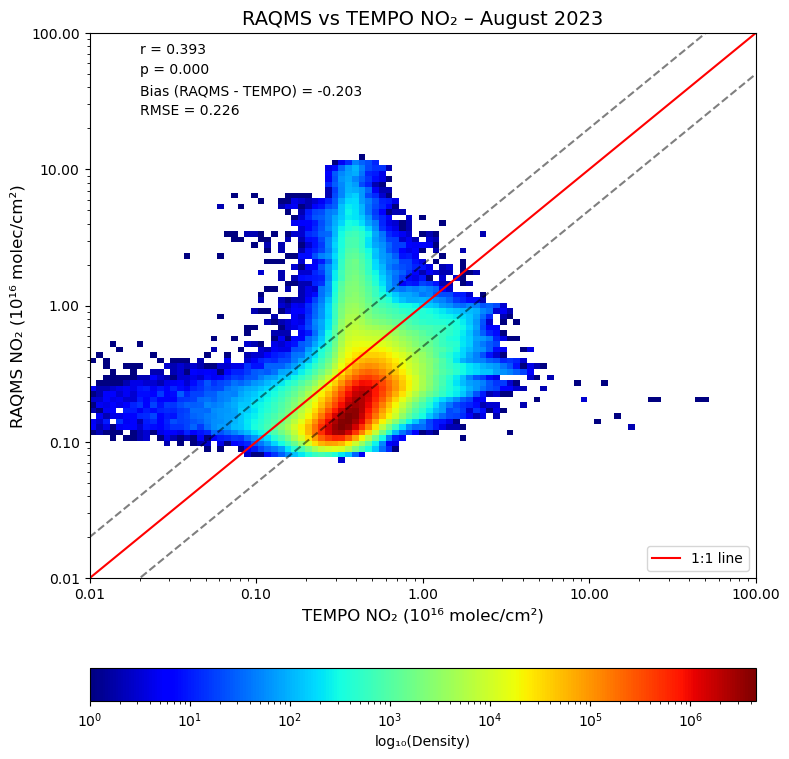

In [ ]:
# statistics
r, p = pearsonr(tempo_all, raqms_all)
bias = np.mean(raqms_all - tempo_all)
rmse = np.sqrt(np.mean((raqms_all - tempo_all)**2))

# histogram bins
# log-spaced bins for better visualization of the data distribution
x_edges = np.logspace(-2, 2, 100)  # 0.01 to 100
y_edges = np.logspace(-2, 2, 100)

# histogram
H, xedges, yedges = np.histogram2d(tempo_all, raqms_all, bins=[x_edges, y_edges])

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
mesh = ax.pcolormesh(xedges, yedges, H.T, norm=LogNorm(), cmap='jet')

# axis
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.01, 100)
ax.set_ylim(0.01, 100)

ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain')
ax.set_xticks([0.01, 0.1, 1, 10, 100])
ax.set_yticks([0.01, 0.1, 1, 10, 100])
ax.tick_params(axis='both', which='major', labelsize=10)

# Labels and title
ax.set_xlabel('TEMPO NO₂ (10¹⁶ molec/cm²)', fontsize=12)
ax.set_ylabel('RAQMS NO₂ (10¹⁶ molec/cm²)', fontsize=12)
ax.set_title('RAQMS vs TEMPO NO₂ – August 2023', fontsize=14)

# 1:1 reference line, RAQMS = TEMPO
ref_line = np.logspace(-2, 2, 100)
ax.plot(ref_line, ref_line, 'r-', linewidth=1.5, label='1:1 line')
# bias lines
ax.plot(ref_line, 2 * ref_line, 'k--', alpha=0.5) # where y = 2x, RAQMS = 2 * GEMS
ax.plot(ref_line, 0.5 * ref_line, 'k--', alpha=0.5) # where y = 0.5x

plt.text(0.02, 70, f"r = {r:.3f}", fontsize=10)
plt.text(0.02, 50, f"p = {p:.3f}", fontsize=10)
plt.text(0.02, 35, f"Bias (RAQMS - TEMPO) = {bias:.3f}", fontsize=10)
plt.text(0.02, 25, f"RMSE = {rmse:.3f}", fontsize=10)

# Colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.12)
cb.set_label('log₁₀(Density)')

# Legend
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig("{output_dir}/density_plot_v2.png", dpi=300, facecolor='white', bbox_inches='tight')
plt.show()


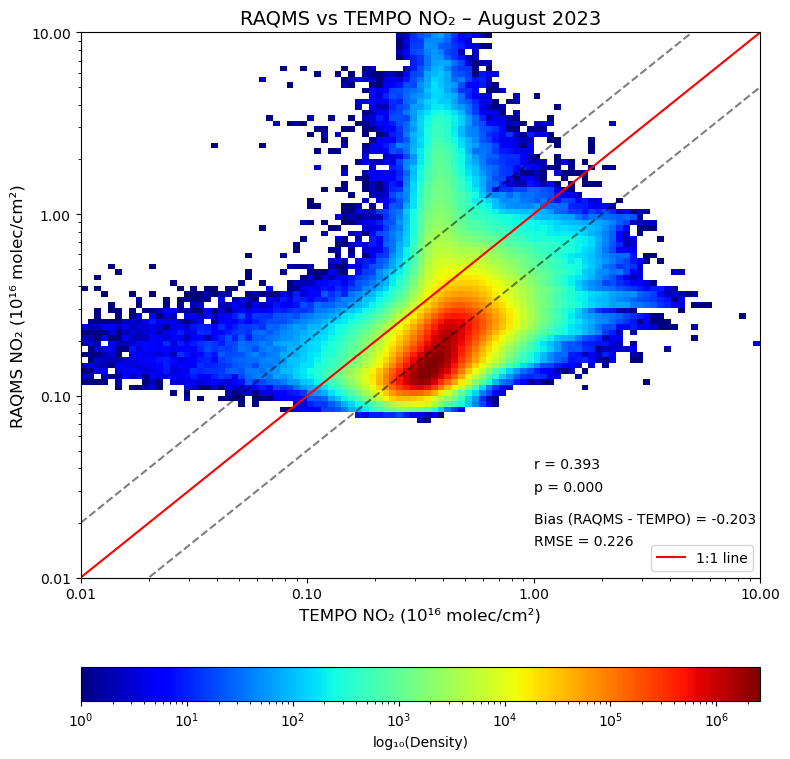

In [54]:
# statistics
r, p = pearsonr(tempo_all, raqms_all)
bias = np.mean(raqms_all - tempo_all)
rmse = np.sqrt(np.mean((raqms_all - tempo_all)**2))

# histogram bins
# log-spaced bins for better visualization of the data distribution
x_edges = np.logspace(-2, 1, 100)  # 0.01 to 10
y_edges = np.logspace(-2, 1, 100)

# histogram
H, xedges, yedges = np.histogram2d(tempo_all, raqms_all, bins=[x_edges, y_edges])

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
mesh = ax.pcolormesh(xedges, yedges, H.T, norm=LogNorm(), cmap='jet')

# axis
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.01, 10)
ax.set_ylim(0.01, 10)

ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain')
ax.set_xticks([0.01, 0.1, 1, 10])
ax.set_yticks([0.01, 0.1, 1, 10])
ax.tick_params(axis='both', which='major', labelsize=10)

# Labels and title
ax.set_xlabel('TEMPO NO₂ (10¹⁶ molec/cm²)', fontsize=12)
ax.set_ylabel('RAQMS NO₂ (10¹⁶ molec/cm²)', fontsize=12)
ax.set_title('RAQMS vs TEMPO NO₂ – August 2023', fontsize=14)

# 1:1 reference line, RAQMS = TEMPO
ref_line = np.logspace(-2, 1, 100)
ax.plot(ref_line, ref_line, 'r-', linewidth=1.5, label='1:1 line')
# bias lines
ax.plot(ref_line, 2 * ref_line, 'k--', alpha=0.5) # where y = 2x, RAQMS = 2 * GEMS
ax.plot(ref_line, 0.5 * ref_line, 'k--', alpha=0.5) # where y = 0.5x

plt.text(1, 0.04, f"r = {r:.3f}", fontsize=10)
plt.text(1, 0.03, f"p = {p:.3f}", fontsize=10)
plt.text(1, 0.02, f"Bias (RAQMS - TEMPO) = {bias:.3f}", fontsize=10)
plt.text(1, 0.015, f"RMSE = {rmse:.3f}", fontsize=10)

# Colorbar
cb = plt.colorbar(mesh, orientation='horizontal', pad=0.12)
cb.set_label('log₁₀(Density)')

# Legend
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig("stats_tempo_logscale2_v2.png", dpi=300, facecolor='white', bbox_inches='tight')
plt.show()


In [13]:
# BIAS MAPS

path = "/home/alubianashari/RAQMS_CloudMasked_TEMPO/"
files = sorted(glob.glob(os.path.join(path, "RAQMS_TEMPO_202308*.nc")))
output_dir = "RAQMS_BiasMaps_TEMPO"
os.makedirs(output_dir, exist_ok=True)

for f in files:
    ds = xr.open_dataset(f)
    date = os.path.basename(f).split("_")[2][:8]

    raqms = ds["no2_masked"].values
    tempo = ds["tempo_no2_avg"].values
    lat = ds["lat"].values
    lon = ds["lon"].values

    # Compute bias: RAQMS - TEMPO
    bias_map = raqms - tempo
    vmin, vmax = -1, 1 

    # Plot
    fig = plt.figure(figsize=(10, 6), dpi=150)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-140, -30, 20, 60], crs=ccrs.PlateCarree())
    ax.add_feature(cf.COASTLINE.with_scale('50m'))
    ax.add_feature(cf.BORDERS.with_scale('10m'), linestyle=':')
    ax.add_feature(cf.LAKES.with_scale('10m'), edgecolor='black', facecolor='none')
    ax.add_feature(cf.STATES.with_scale('10m'), facecolor='none', edgecolor='black', linewidth=0.4)

    im = ax.pcolormesh(lon, lat, bias_map, cmap="bwr", vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
    plt.colorbar(im, ax=ax, orientation='horizontal', label="RAQMS − TEMPO NO₂\n(10¹⁶ molec/cm²)", fraction=0.046, pad=0.1)

    ax.set_title(f"RAQMS − TEMPO NO₂ Map – {date}")
    ax.set_xticks(np.arange(-140, -30 + 1, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(20, 60 + 1, 10), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())

    # Save
    plt.savefig(f"{output_dir}/BiasMap_{date}.png", bbox_inches="tight")
    plt.close()

print(f"\done")


\done


Skipping 20230823
Skipping 20230827


/tmp/ipykernel_2541555/3245201752.py:34: RuntimeWarning: Mean of empty slice
  monthly_mean_bias = np.nanmean(bias_array, axis=0)


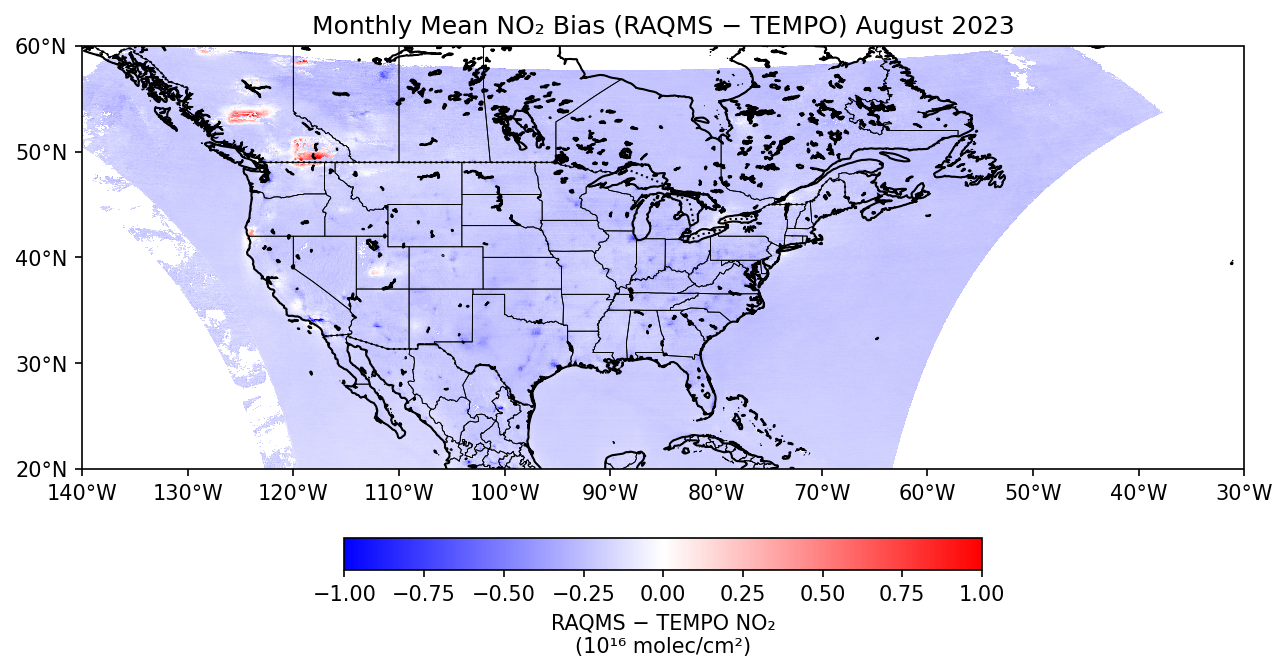

In [55]:
# Monthly Bias Plot with excluded dates
# File path
path = "/home/alubianashari/RAQMS_CloudMasked_TEMPO/"
files = sorted(glob.glob(os.path.join(path, "RAQMS_TEMPO_202308*.nc")))

# exclude specific dates
exclude_dates = ["20230823", "20230827"]

# List to hold bias data
bias_stack = []

# Loop through files
for f in files:
    filename = os.path.basename(f)
    date_str = filename.split("_")[2][:8]

    if date_str in excluded_dates:
        print(f"Skipping {date_str}")
        continue

    ds = xr.open_dataset(f)
    raqms = ds["no2_masked"].values
    tempo = ds["tempo_no2_avg"].values

    # Mask invalid points
    valid = ~np.isnan(raqms) & ~np.isnan(tempo)
    bias = np.full_like(raqms, np.nan)
    bias[valid] = raqms[valid] - tempo[valid]

    bias_stack.append(bias)

# Stack and compute monthly mean
bias_array = np.stack(bias_stack)
monthly_mean_bias = np.nanmean(bias_array, axis=0)

# Extract coordinates
lat = ds["lat"].values
lon = ds["lon"].values

# Plot
vmin, vmax = -1, 1
fig = plt.figure(figsize=(10, 6), dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-140, -30, 20, 60], crs=ccrs.PlateCarree())

ax.add_feature(cf.COASTLINE.with_scale('50m'))
ax.add_feature(cf.BORDERS.with_scale('10m'), linestyle=':')
ax.add_feature(cf.LAKES.with_scale('10m'), edgecolor='black', facecolor='none')
ax.add_feature(cf.STATES.with_scale('10m'), facecolor='none', edgecolor='black', linewidth=0.4)

mesh = ax.pcolormesh(lon, lat, monthly_mean_bias, cmap="bwr", vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
plt.colorbar(mesh, ax=ax, orientation='horizontal', label="RAQMS − TEMPO NO₂\n(10¹⁶ molec/cm²)", fraction=0.046, pad=0.1)

ax.set_title("Monthly Mean NO₂ Bias (RAQMS − TEMPO) August 2023")
ax.set_xticks(np.arange(-140, -30 + 1, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(20, 60 + 1, 10), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

plt.savefig("monthly_avg_TEMPO/MonthlyBias_Aug2023_v2.png", bbox_inches="tight")
plt.show()


In [56]:
# Find index of max bias
max_idx = np.unravel_index(np.nanargmax(monthly_mean_bias), monthly_mean_bias.shape)
i_max, j_max = max_idx

# Get value and coordinates
max_bias_value = monthly_mean_bias[i_max, j_max]
lat_max = lat[i_max]
lon_max = lon[j_max]

print(max_bias_value)
print(lat_max, lon_max)


2.0279799
58.59 -119.19


In [57]:
# Find index of min bias
min_idx = np.unravel_index(np.nanargmin(monthly_mean_bias), monthly_mean_bias.shape)
i_min, j_min = min_idx

# Get value and coordinates
min_bias_value = monthly_mean_bias[i_min, j_min]
lat_min = lat[i_min]
lon_min = lon[j_min]

print(min_bias_value)
print(lat_min, lon_min)


-3.044709
42.13 -115.43


In [58]:
idx = np.nanargmin(np.abs(monthly_mean_bias))
i0, j0 = np.unravel_index(idx, monthly_mean_bias.shape)

closest_value = monthly_mean_bias[i0, j0]
lat0 = lat[i0]
lon0 = lon[j0]

print(closest_value)
print(lat0, lon0)

1.8030405e-06
53.47 -122.09


In [63]:
# target coordinates
target_lat = 53.47
target_lon = -122.09

# index of closest grid point
i = np.abs(lat - target_lat).argmin()
j = np.abs(lon - target_lon).argmin()

print(lat[i], lon[j])

53.47 -122.09


In [64]:
excluded_dates = ["20230823", "20230827"]

dates = []
raqms_series = []
tempo_series = []
bias_series = []

for f in files:
    filename = os.path.basename(f)
    date_str = filename.split("_")[2][:8]

    # Skip excluded dates
    if date_str in excluded_dates:
        print(f"Skipping {date_str}")
        continue

    ds = xr.open_dataset(f)
    dates.append(datetime.strptime(date_str, "%Y%m%d"))

    raqms_val = ds["no2_masked"].values[i, j]
    tempo_val = ds["tempo_no2_avg"].values[i, j]

    raqms_series.append(raqms_val)
    tempo_series.append(tempo_val)

    # Calculate bias only if both are valid
    if not np.isnan(raqms_val) and not np.isnan(tempo_val):
        bias_series.append(raqms_val - tempo_val)
    else:
        bias_series.append(np.nan)

    print(f"{date_str}: RAQMS={raqms_val}, TEMPO={tempo_val}")



20230802: RAQMS=nan, TEMPO=nan
20230804: RAQMS=0.18526387214660645, TEMPO=0.3531526236769347
20230805: RAQMS=0.1974715292453766, TEMPO=0.41917920239247347
20230806: RAQMS=0.20209410786628723, TEMPO=0.38537823633846247
20230807: RAQMS=nan, TEMPO=nan
20230808: RAQMS=nan, TEMPO=nan
20230809: RAQMS=0.14250078797340393, TEMPO=0.3814774915330905
20230811: RAQMS=nan, TEMPO=nan
20230812: RAQMS=nan, TEMPO=nan
20230815: RAQMS=nan, TEMPO=nan
20230816: RAQMS=0.5929087996482849, TEMPO=0.33005337724809075
20230817: RAQMS=1.7920491695404053, TEMPO=0.374500373012588
20230818: RAQMS=nan, TEMPO=nan
20230819: RAQMS=0.18218210339546204, TEMPO=0.46812249470024797
20230820: RAQMS=0.17276519536972046, TEMPO=0.45325302780616705
20230821: RAQMS=nan, TEMPO=nan
20230822: RAQMS=nan, TEMPO=nan
Skipping 20230823
20230825: RAQMS=0.16451916098594666, TEMPO=0.2963562103697576
20230826: RAQMS=nan, TEMPO=nan
Skipping 20230827
20230828: RAQMS=0.20343340933322906, TEMPO=0.37369703986367725
20230829: RAQMS=nan, TEMPO=nan
2

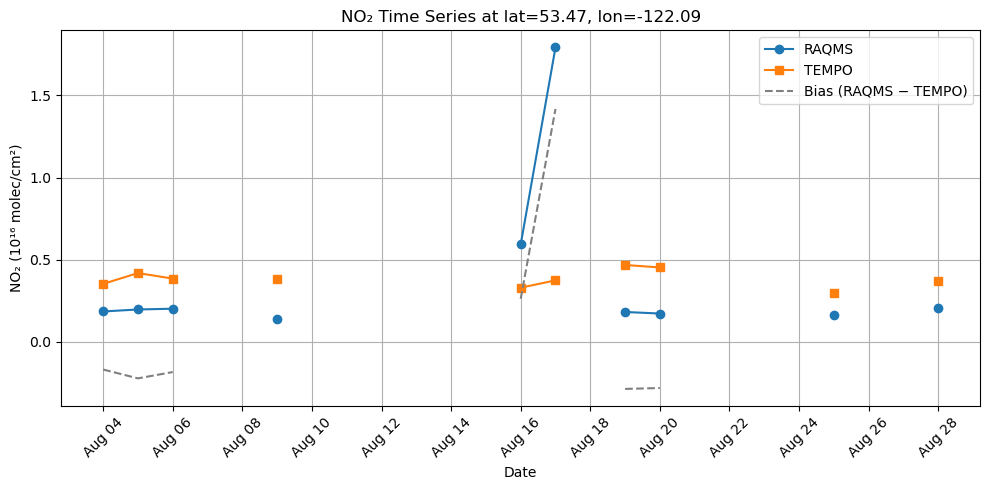

In [65]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

plt.figure(figsize=(10, 5))
plt.plot(dates, raqms_series, label="RAQMS", marker="o")
plt.plot(dates, tempo_series, label="TEMPO", marker="s")
plt.plot(dates, bias_series, label="Bias (RAQMS − TEMPO)", linestyle="--", color="gray")

plt.title(f"NO₂ Time Series at lat={lat[i]:.2f}, lon={lon[j]:.2f}")
plt.ylabel("NO₂ (10¹⁶ molec/cm²)")
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("monthly_avg_TEMPO/TimeSeries_nearest0_v2.png")

plt.show()
